# Looking to see if the differences to an ellipsoid can be explained using simple representations of Bernard's body

- This will help to tell us whether the difference in differential phase that appears in the modelling results is a genuine physical result or a modelling error

Need to load:

    - iteration 1 and 2 experiments

    - old just body experiments

    - ellipsoid experiments

In [1]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [2]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [3]:
pol_list = ['H', 'V']
morpho_list = ['Moth body', 'Prolate spheroid', 'Two spheroid body', 'Three spheroid body',]  

data_dict = {x : {y: None for y in morpho_list} for x in pol_list}

### Load Bernard and ellipsoid into data_dict

In [4]:
for pol in pol_list:
    BODY_PATH = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/morpho_analysis/Bernard_parameterised_560_{pol}_M_1000_body_p0_s0_df.csv'
    data_dict[pol]['Moth body'] = pd.read_csv(BODY_PATH)
    
    ELLIPSOID_BODY_PATH = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/csv/Ellipsoid_parameterised_560_{pol}_1000_p0_s0__df.csv'
    data_dict[pol]['Prolate spheroid'] = pd.read_csv(ELLIPSOID_BODY_PATH)

### Process Multi-Ellipsoid Bernard data

In [5]:
path_list = [
    BASE_DRIVE_PATH + 'Multi_shape_body/Iteration_1/three_sphere_bernard_10_5_2_',
    BASE_DRIVE_PATH + 'Multi_shape_body/Iteration_2/two_sphere_bernard_15_2_'
]

for pol in pol_list:
    for base_path, name in zip(path_list, ['Three spheroid body', 'Two spheroid body']):
            path = base_path + f'{pol}.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = path + f'{pol}.csv'
            df.to_csv(output_path)
            data_dict[pol][name] = df

In [6]:
def get_horizontal_returned_phase(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    phase = np.angle(horizontal_field) * 180 / np.pi
    return phase

def get_vertical_returned_phase(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    phase = np.angle(vertical_field) * 180 / np.pi
    return phase

def get_horizontal_returned_power(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    power = np.abs(horizontal_field)**2
    return power

def get_vertical_returned_power(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    power = np.abs(vertical_field)**2
    return power

def get_linear_depol_ratio(df):
    horizontal_power = get_horizontal_returned_power(df)
    vertical_power = df['Etheta'].astype(complex).to_numpy()
    vertical_power = np.abs(vertical_power)**2
    depol_ratio = 10 * np.log10(vertical_power / horizontal_power)
    return depol_ratio

In [7]:
vars_list = ['HH_power', 'VV_power', 'Zdr', 'LDR', 'HH_phase', 'VV_phase', 'PhiDP']

In [8]:
results_dict = {y : {z : None for z in vars_list} for y in morpho_list}


for morpho in morpho_list: 
    results_dict[morpho]['HH_power'] = get_horizontal_returned_power(data_dict['H'][morpho])
    results_dict[morpho]['VV_power'] = get_vertical_returned_power(data_dict['V'][morpho])
    results_dict[morpho]['HH_phase'] = get_horizontal_returned_phase(data_dict['H'][morpho])
    results_dict[morpho]['VV_phase'] = get_vertical_returned_phase(data_dict['V'][morpho])
    results_dict[morpho]['LDR'] = get_linear_depol_ratio(data_dict['H'][morpho])

    dp = DualPol(data_dict['H'][morpho], data_dict['V'][morpho], read_from_df=True)
    dp._calculate_differential_reflectivity()
    dp._calculate_differential_phase()

    results_dict[morpho]['Zdr'] = dp.differential_reflectivity
    results_dict[morpho]['PhiDP'] = dp.differential_phase

# Power analysis

Text(0.5, 1.0, 'Variation of HH scattered power for different body models at 5.6GHz')

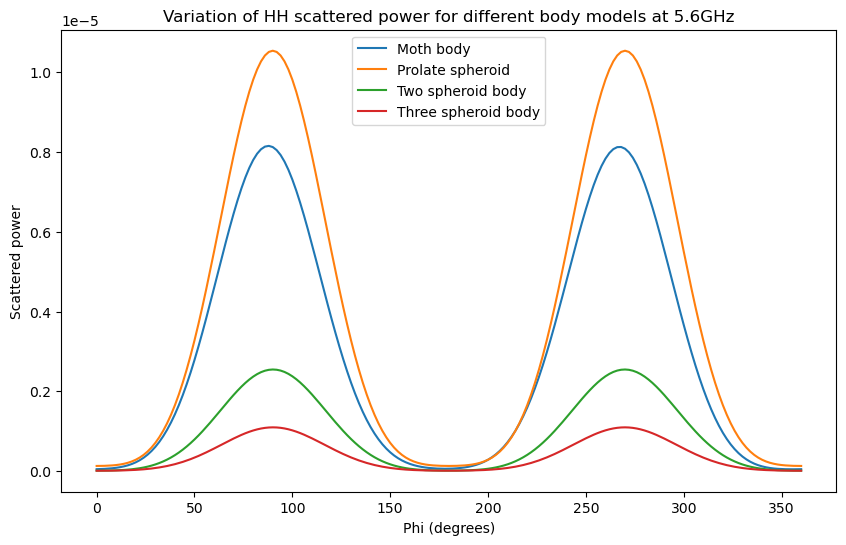

In [9]:
pol = 'H'

for morpho in morpho_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of HH scattered power for different body models at 5.6GHz')

Text(0.5, 1.0, 'Variation of VV scattered power for different body models at 5.6GHz')

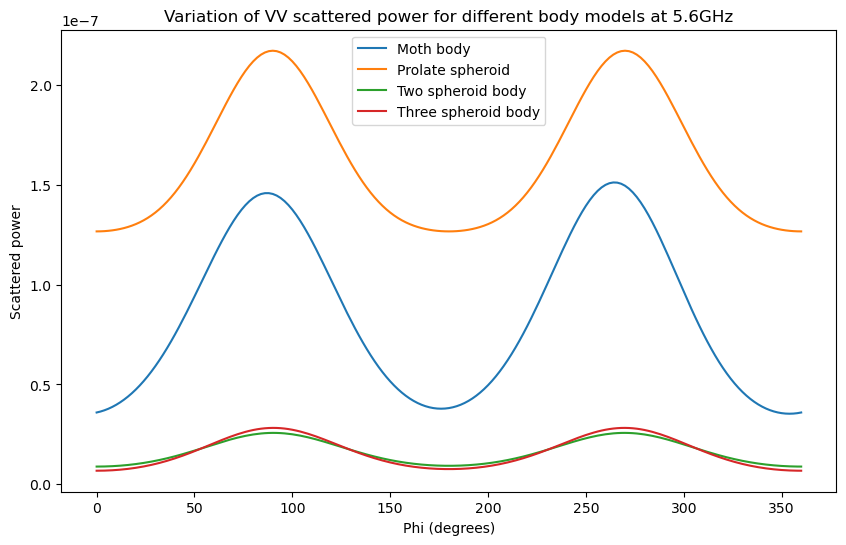

In [10]:
pol = 'H'

for morpho in morpho_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of VV scattered power for different body models at 5.6GHz')

Text(0.5, 1.0, 'Variation of differential reflectivity for different body models at 5.6GHz')

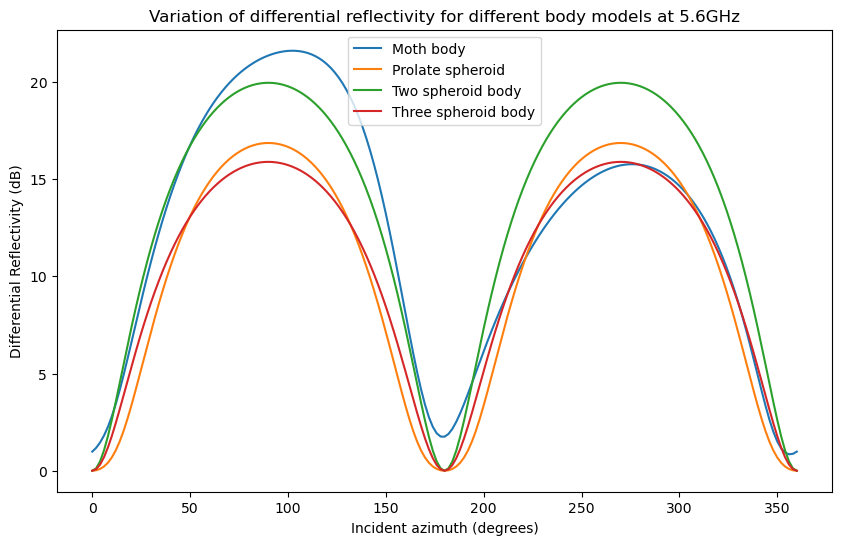

In [11]:
for morpho in morpho_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['Zdr'], label=f'{morpho}', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential Reflectivity (dB)')
plt.title(f'Variation of differential reflectivity for different body models at 5.6GHz')


Text(0.5, 1.0, 'Variation of LDR for different body models at 5.6GHz')

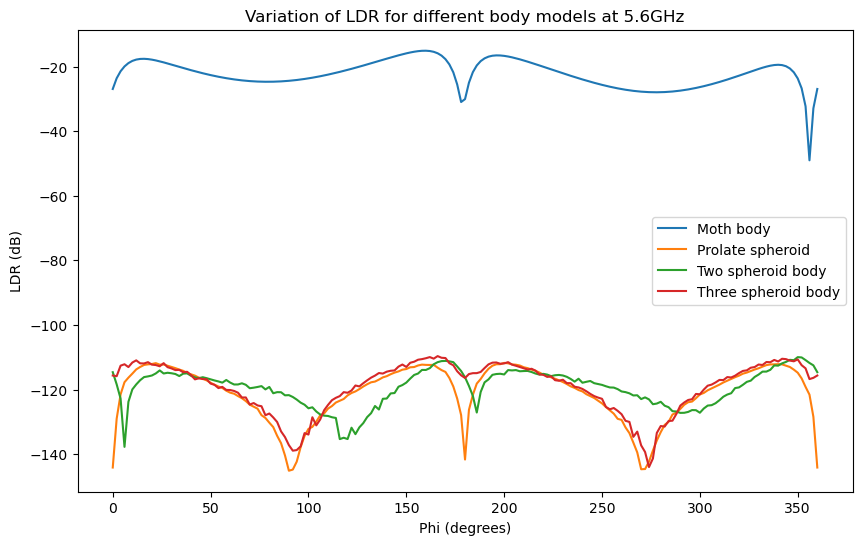

In [12]:
for morpho in morpho_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['LDR'], label=f'{morpho}', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('LDR (dB)')
plt.title(f'Variation of LDR for different body models at 5.6GHz')

## Phase for different body_models

Text(0.5, 1.0, 'Variation of HH phase for different body models at 5.6GHz')

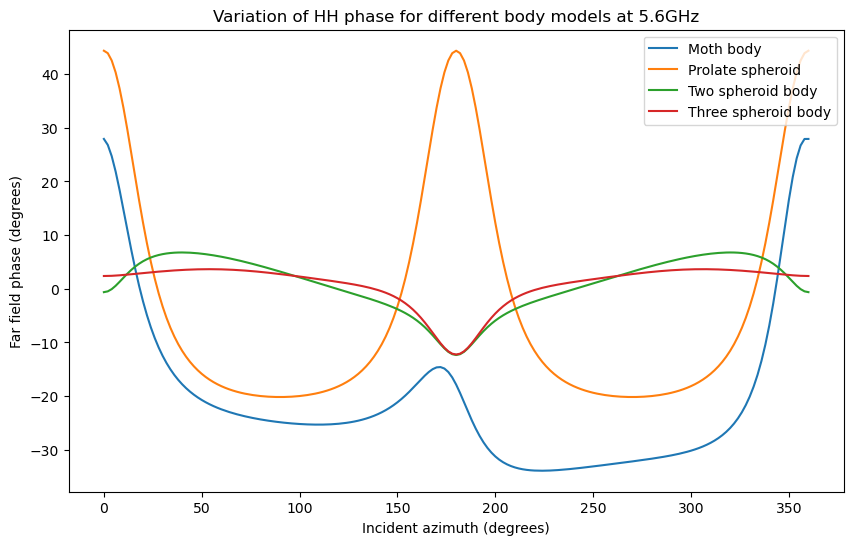

In [13]:
for morpho in morpho_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Far field phase (degrees)')
plt.title(f'Variation of HH phase for different body models at 5.6GHz')

Text(0.5, 1.0, 'Variation of VV phase for different body models at 5.6GHz')

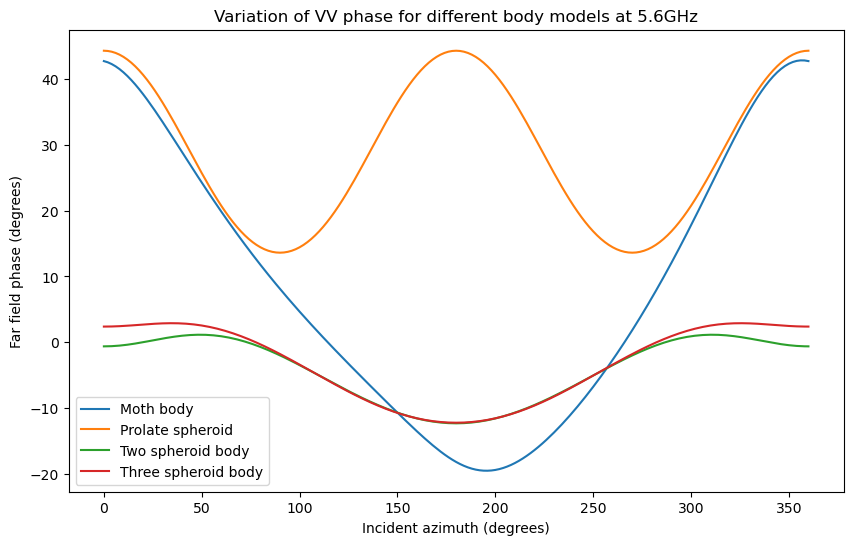

In [14]:
for morpho in morpho_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Far field phase (degrees)')
plt.title(f'Variation of VV phase for different body models at 5.6GHz')

Text(0.5, 1.0, 'Variation of differential phase for different body models at 5.6GHz')

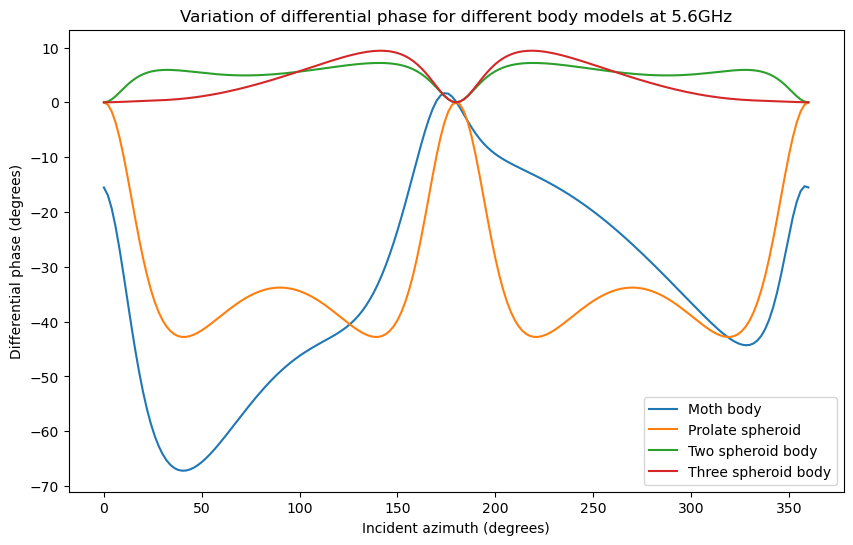

In [15]:
for morpho in morpho_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['PhiDP'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of differential phase for different body models at 5.6GHz')